In [1]:
OUTPUT_FOLDER = '/mnt/data/processed/'

import glob
patient_ids = glob.glob(OUTPUT_FOLDER + 'original_resolution/*.npy')
patient_ids = [ x.replace(OUTPUT_FOLDER + 'original_resolution/', '').replace('.npy', '') for x in patient_ids ]


In [2]:
from pylab import *
%matplotlib inline

In [3]:
import random
import numpy as np

vsize = np.array([16,32,32])

def get_volume(image, segmented_image, vsize, min_overlap = 0.2):
    while True:
        pos = np.asarray([ np.random.randint(k, image.shape[k] - vsize[k]) for k in range(3) ])
        print(pos)
        volume = image[pos[0]:pos[0]+vsize[0], pos[1]:pos[1]+vsize[1], pos[2]:pos[2]+vsize[2]]
        segmented_volume = segmented_image[pos[0]:pos[0]+vsize[0], pos[1]:pos[1]+vsize[1], pos[2]:pos[2]+vsize[2]]
        overlap = np.mean(segmented_volume)
        print(overlap)
        # check if it is within or partly within lung
        # if entirely outside lung, try again
        if overlap >= min_overlap:
            break
    return volume, segmented_volume, overlap

    
def generator():
    while True:
        # open random image
        pid = random.choice(patient_ids)
        image = np.load(OUTPUT_FOLDER + 'original_resolution/' + pid + '.npy')
        segmented_image = np.load(OUTPUT_FOLDER + 'segmented_lungs/' + pid + '.npy')
        # grab random volume
        pos = np.asarray([ np.random.randint(k, image.shape[k] - vsize[k]) for k in range(3) ])
        print(pos)
        overlap = np.mean(segmented_image[pos[0]:pos[0]+vsize[0], pos[1]:pos[1]+vsize[1], pos[2]:pos[2]+vsize[2]])
        print(overlap)
        # check if it is within or partly within lung
        # if entirely outside lung, try again
        if overlap < 0.2:
            continue
        if overlap < 1:
            label = 0
        else:
            label = 1
        return image[pos[0]:pos[0]+vsize[0], pos[1]:pos[1]+vsize[1], pos[2]:pos[2]+vsize[2]]

# cube = generator()
# for n in range(16):
#     imshow(cube[n,:,:], vmin=-1000, vmax=1000, cmap='gray')
#     show()

In [ ]:
volume = np.zeros((32,32,32))
mask = np.zeros((32,32,32), dtype=np.int)
mask[8:8+16,8:8+16,8:8+16] = 1
central_density = np.mean(volume[mask]) - np.mean(volume[1 - mask])

In [4]:
for n, pid in enumerate(patient_ids):
    if "028996" in pid:
        print(n)

1422


In [5]:
pid = patient_ids[1422] # 429
image = np.load(OUTPUT_FOLDER + 'original_resolution/' + pid + '.npy')
segmented_image = np.load(OUTPUT_FOLDER + 'segmented_lungs/' + pid + '.npy')
pid

'028996723faa7840bb57f57e28275e4c'

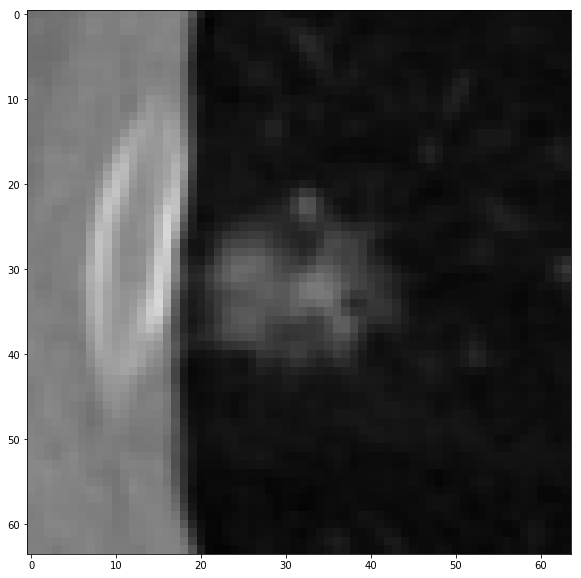

In [16]:
figure(figsize=(10,10))
mip = np.amax(image[61-4:61+4], axis=0)
#imshow(mip[278-32:278+32, 91-32:91+32], vmin=-1000, vmax=1000, cmap='gray')
imshow(image[123,278-32:278+32, 93-32:93+32], vmin=-1000, vmax=1000, cmap='gray')

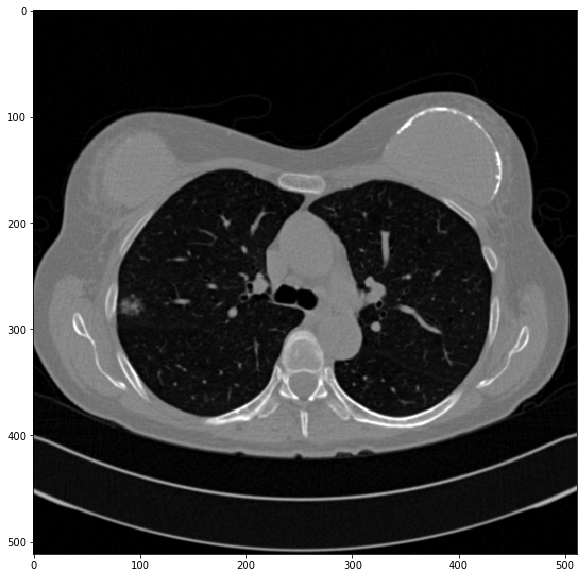

In [13]:
figure(figsize=(10,10))
mip = np.amax(image[61-4:61+4], axis=0)
#imshow(mip[278-32:278+32, 91-32:91+32], vmin=-1000, vmax=1000, cmap='gray')
imshow(image[123], vmin=-1000, vmax=1000, cmap='gray')

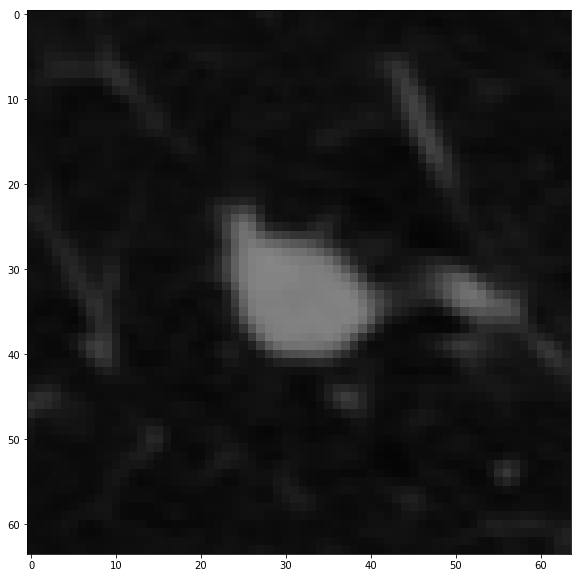

In [36]:
figure(figsize=(10,10))
imshow(image[67, 185-32:185+32, 110-32:110+32], vmin=-1000, vmax=1000, cmap='gray')

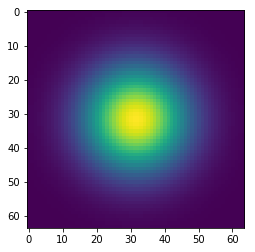

In [71]:
from scipy import signal
vsize = (32,64,64)
mask = signal.gaussian(vsize[1], std=vsize[1]/6)[:,None] * signal.gaussian(vsize[2], std=vsize[2]/6)[None,:]
imshow(mask)

In [75]:
volume, segmented_volume, overlap = get_volume(image, segmented_image, (32,64,64), min_overlap = 0.8)
# density = np.mean(volume[])

[ 26 401  64]
0.0
[ 28 357 293]
0.0329055786133
[  7 337 149]
0.0662994384766
[ 31 229 187]
0.760345458984
[ 48 136  43]
0.691268920898
[ 85 377  10]
0.0
[ 33  92 221]
0.013298034668
[100 152 338]
0.464660644531
[ 48 313  14]
0.0927505493164
[ 82 269 146]
1.0


In [17]:
#nodule = image[67-16:67+16, 185-32:185+32, 110-32:110+32]
nodule = image[123-16:123+16,278-32:278+32, 93-32:93+32]
nodule.shape

(32, 64, 64)

In [18]:
imshow(volume[16,:,:])

NameError: name 'volume' is not defined

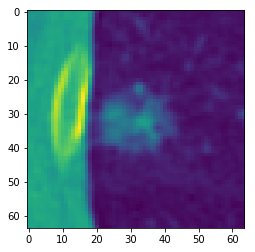

In [19]:
imshow(nodule[16,:,:])

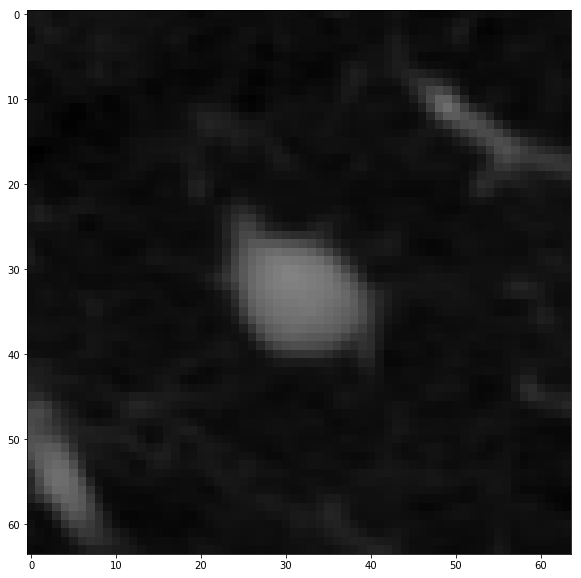

In [57]:
figure(figsize=(10,10))
imshow(volume[16] * (1-mask) + nodule[16] * mask, vmin=-1000, vmax=1000, cmap='gray')

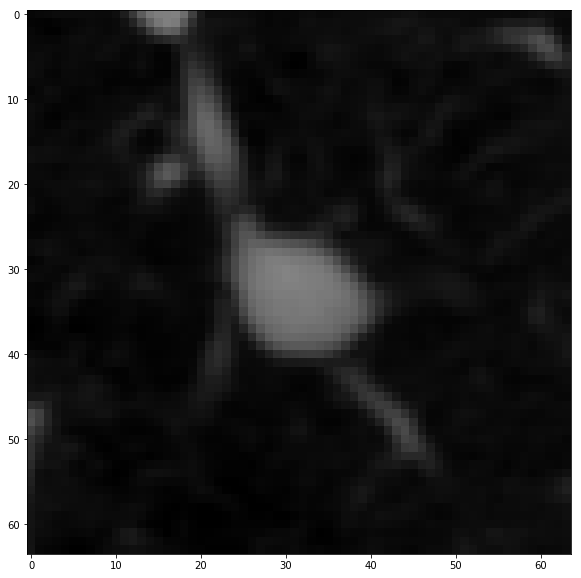

In [76]:
x = np.amax( np.dstack(((volume[16]+1000) * (1-mask), (nodule[16]+1000) * mask)), axis=2 ) - 1000

figure(figsize=(10,10))
imshow(x, vmin=-1000, vmax=1000, cmap='gray')

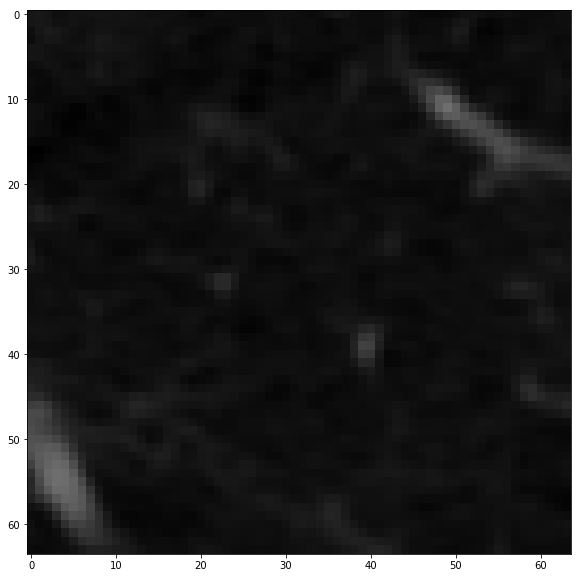

In [69]:
figure(figsize=(10,10))
imshow(volume[16], vmin=-1000, vmax=1000, cmap='gray')

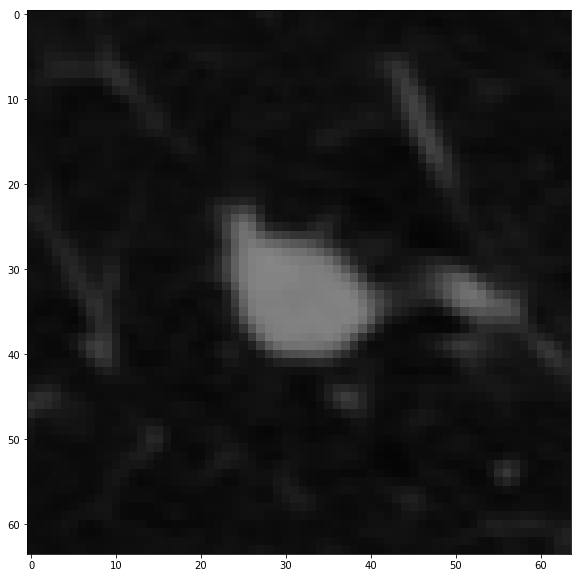

In [70]:
figure(figsize=(10,10))
imshow(nodule[16], vmin=-1000, vmax=1000, cmap='gray')

In [29]:
mask2 = make_mask(sigma=5)
mask = make_mask(sigma=10)

for n in range(100):
    volume2, _, _ = get_volume(image, segmented_image, (32,64,64), min_overlap = 0.8)
    density = np.mean((volume2[16]+1000) * mask2) / np.mean(mask2) - 1000
    print(density)
    if density > -700:
        break

[131 322  82]
0.209327697754
[ 87 234  21]
0.177558898926
[148  68 261]
0.0
[102 338  10]
0.0
[ 39  66 354]
0.0
[ 84 343 352]
0.389167785645
[135 302 437]
0.0
[138 163 121]
0.112113952637
[105 268 187]
0.740676879883
[ 51  67 262]
0.0
[ 18 397 216]
0.0
[137 271 154]
0.926834106445
-870.610212892
[ 78 217 125]
0.849014282227
-889.183823118
[ 63  14 134]
0.0
[119 406 293]
0.0
[ 65 273 404]
0.420829772949
[ 21 364 226]
0.0
[ 36 202 143]
0.400985717773
[29 40 21]
0.0
[ 86 162 113]
0.948722839355
-870.108138731
[130 391 199]
0.0
[ 97 364 178]
0.0816116333008
[ 63 391 194]
0.0
[ 41 165 307]
0.0396499633789
[ 59  36 327]
0.0
[146 177 394]
0.000900268554688
[131 156  34]
0.0
[119 318 109]
0.715057373047
[134 443  52]
0.0
[ 49 406 288]
0.0
[ 14 393 423]
0.0
[ 34  39 268]
0.0
[ 57 437 181]
0.0
[ 56 394 391]
0.0
[135 406 125]
0.0
[113 342 319]
0.502235412598
[ 37 297 384]
0.52611541748
[ 76 228 309]
0.607429504395
[ 22 107 334]
0.0283737182617
[69 39 93]
0.0
[105  37 304]
0.0
[122 401 340]
0.0
[ 

In [21]:
from scipy import signal
def make_mask(vsize = (32,64,64), sigma=10):
    mask = signal.gaussian(vsize[1], std=sigma)[:,None] * signal.gaussian(vsize[2], std=sigma)[None,:]
    return mask

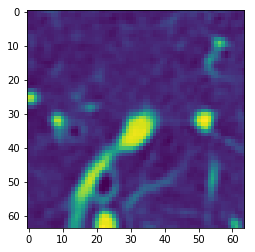

In [30]:
imshow(volume2[16])

In [25]:
def compose_amax(volume, nodule, mask):
    x = np.amax( np.dstack(((volume[16]+1000) * (1-mask), (nodule[16]+1000) * mask)), axis=2 ) - 1000
    return x

def compose_amax2(volume, nodule, mask):
    x = np.amax( np.dstack(((volume[16]+1000), (nodule[16]+1000) * mask)), axis=2 ) - 1000
    return x

def compose_mean(volume, nodule, mask):
    x = volume[16] * (1-mask) + nodule[16] * mask
    return x


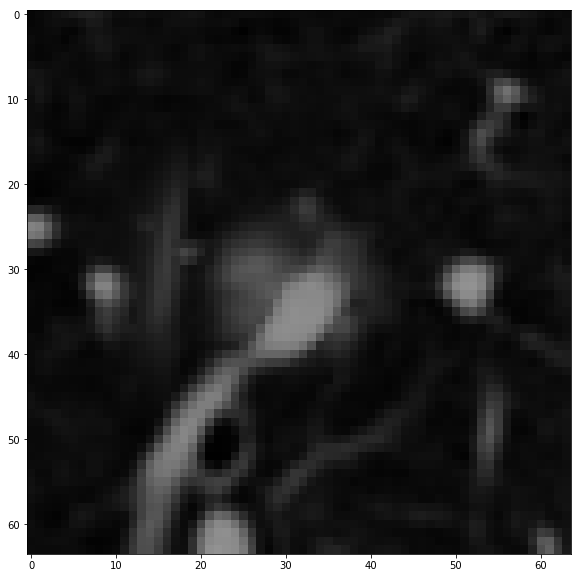

In [31]:
figure(figsize=(10,10))
imshow(compose_amax2(volume2, nodule, mask), vmin=-1000, vmax=1000, cmap='gray')

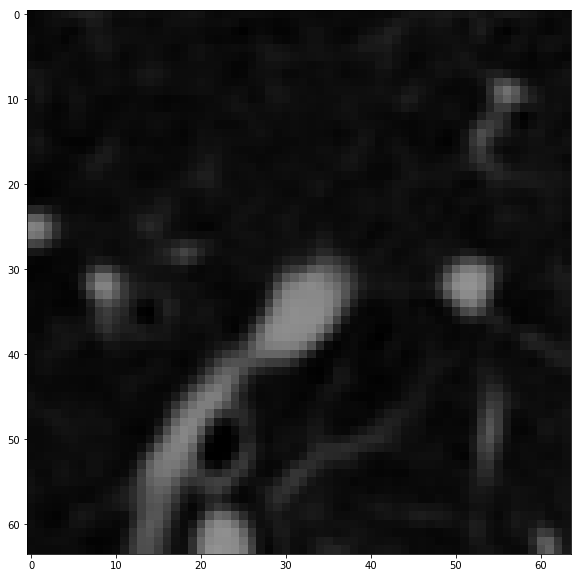

In [32]:
figure(figsize=(10,10))
imshow(volume2[16], vmin=-1000, vmax=1000, cmap='gray')